### _NormalIP_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- _Not sure if weight should be used. So set it 1 for all plots_

In [2]:
def s_to_b(sig_eff, bkg_eff, weight=0.589):
    return (sig_eff/(weight*bkg_eff))

In [3]:
def s_to_sqrtb(sig_eff, bkg_eff, weight=0.589):
    return (sig_eff/np.sqrt(weight*bkg_eff))

In [4]:
def s_to_sqrtsb(sig_eff, bkg_eff, weight=0.589):
    return (sig_eff/np.sqrt(sig_eff + weight*bkg_eff))

In [5]:
def FoM(sig_eff, bkg_eff, weight=0.589):
    fom = (sig_eff*64.1*0.639*0.639)/(weight*bkg_eff*15.4)
    return fom

- _Load CSVs_

In [6]:
# NormalIP Case
efwp1 = pd.read_csv("efwp1-optz.csv")
ebkg1 = pd.read_csv("ebkg1-optz.csv")

In [7]:
efwp1.head()

dvz  events
0  0.0  161427
1  0.2  161111
2  0.4  160755
3  0.6  160312
4  0.8  159795

In [8]:
ebkg1.head()

dvz  events
0  0.0   15043
1  0.2   13544
2  0.4   12327
3  0.6   11228
4  0.8   10313

- _Get Signal to Bkg Ratio_

$Ratio := \frac{S}{B}$

In [9]:
# s/b
sb = s_to_b(efwp1['events'], ebkg1['events'], weight=1)

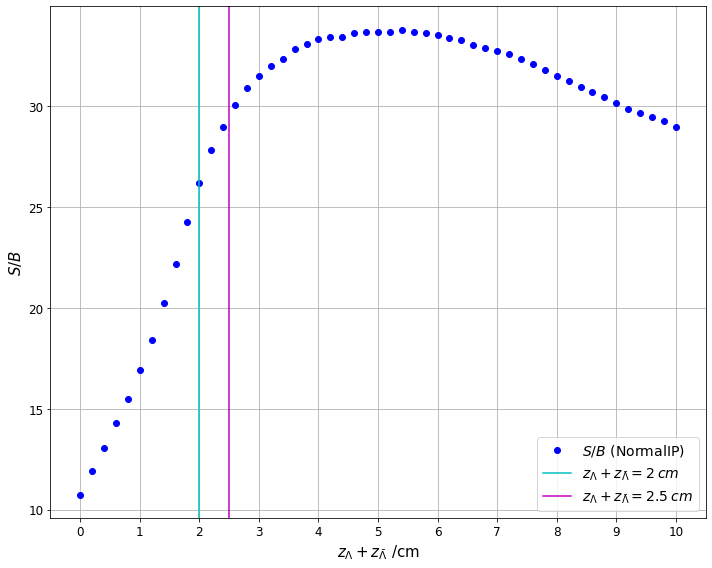

In [10]:
plt.figure(figsize=(10,8))
plt.plot(efwp1["dvz"].values, sb, 'bo', label=r'$S/B$ (NormalIP)')
plt.axvline(x=2.0, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2 \: cm$', c='c')
plt.axvline(x=2.5, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.5 \: cm$', c='m')

# Call Commands:
# plt.title('Optimizing Decay Vertex Cut')
plt.xlabel(r'$z_{\Lambda} + z_{\bar{\Lambda}}$ /cm', fontsize=15)
plt.ylabel('$S/B$', fontsize=15)
plt.xticks(np.arange(min(efwp1["dvz"]), max(efwp1["dvz"])+1, 1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14, loc='best')
plt.tight_layout()
plt.savefig('s_b_1.pdf')

- _Get Signal to Bkg Ratio_

$Ratio := \frac{S}{\sqrt{B}}$

In [11]:
# s/sqrt(b)
s_b = s_to_sqrtb(efwp1['events'], ebkg1['events'], weight=1)

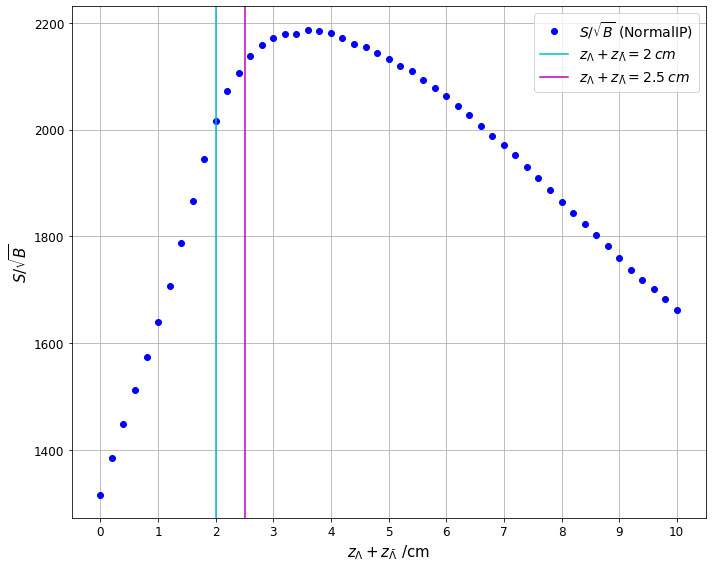

In [12]:
plt.figure(figsize=(10,8))
plt.plot(efwp1["dvz"].values, s_b, 'bo', label=r'$S/\sqrt{B}$ (NormalIP)')
plt.axvline(x=2.0, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2 \: cm$', c='c')
plt.axvline(x=2.5, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.5 \: cm$', c='m')

# Call Commands:
# plt.title('Optimizing Decay Vertex Cut')
plt.xlabel(r'$z_{\Lambda} + z_{\bar{\Lambda}}$ /cm', fontsize=15)
plt.ylabel('$S/\sqrt{B}$', fontsize=15)
plt.xticks(np.arange(min(efwp1["dvz"]), max(efwp1["dvz"])+1, 1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14, loc='best')
plt.tight_layout()
plt.savefig('s_sqrtb_1.pdf')

- _Get Signal to Bkg Ratio_

$Ratio := \frac{S}{\sqrt{S+B}}$

In [13]:
# s/sqrt(s+b)
s_sb = s_to_sqrtsb(efwp1['events'], ebkg1['events'], weight=1)

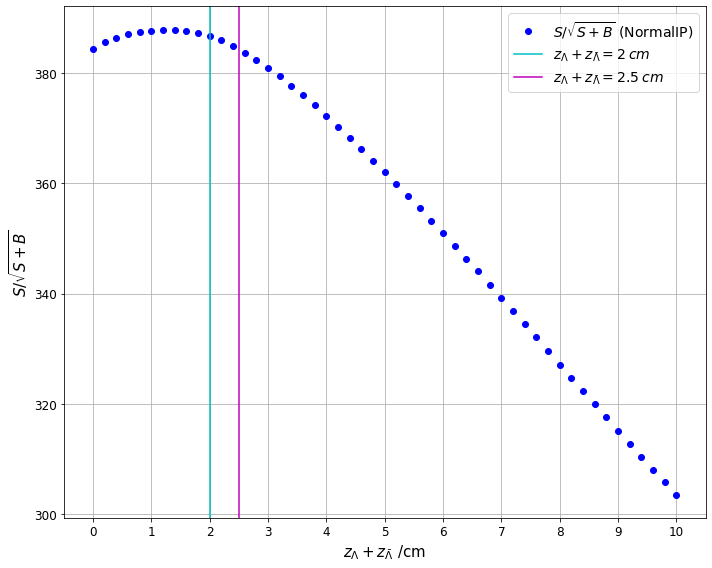

In [14]:
plt.figure(figsize=(10,8))
plt.plot(efwp1["dvz"].values, s_sb, 'bo', label='$S/\sqrt{S+B}$ (NormalIP)')

plt.axvline(x=2.0, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2 \: cm$', c='c')
plt.axvline(x=2.5, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.5 \: cm$', c='m')

# Call Commands:
# plt.title('Optimizing Decay Vertex Cut')
plt.xlabel(r'$z_{\Lambda} + z_{\bar{\Lambda}}$ /cm', fontsize=15)
plt.ylabel('$S/\sqrt{S+B}$', fontsize=15)
plt.xticks(np.arange(min(efwp1["dvz"]), max(efwp1["dvz"])+1, 1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14, loc='best')
plt.tight_layout()
plt.savefig('s_sqrtsb_1.pdf')

- _Get FoM_

$FoM := \frac{\epsilon(\bar{p}p \rightarrow \bar{\Lambda}\Lambda) \times \sigma(\bar{p}p \rightarrow \bar{\Lambda}\Lambda) \times BR(\bar{p}p \rightarrow \bar{\Lambda}\Lambda)^2}{\epsilon(\bar{p}p \rightarrow \bar{p}p\pi^+\pi^-) \times \sigma(\bar{p}p \rightarrow \bar{p}p\pi^+\pi^-)}$

In [15]:
# Figure of Merit
fom = FoM(efwp1['events'], ebkg1['events'], weight=1)

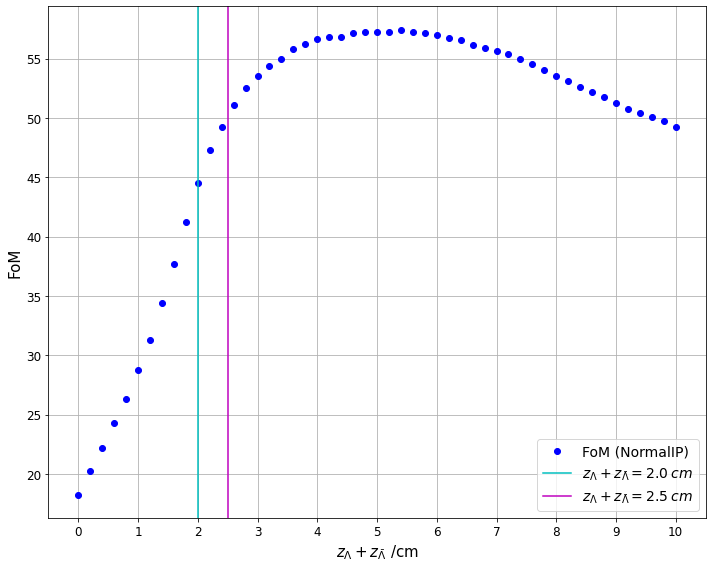

In [16]:
plt.figure(figsize=(10,8))
#plt.plot(efwp1["dvz"].values, fom, 'bo', label=r'FoM := $\frac{\epsilon(\bar{p}p \rightarrow \bar{\Lambda}\Lambda) \times \sigma(\bar{p}p \rightarrow \bar{\Lambda}\Lambda) \times BR(\bar{p}p \rightarrow \bar{\Lambda}\Lambda)^2}{\epsilon(\bar{p}p \rightarrow \bar{p}p\pi^+\pi^-) \times \sigma(\bar{p}p \rightarrow \bar{p}p\pi^+\pi^-)}$ (NormalIP)')
plt.plot(efwp1["dvz"].values, fom, 'bo', label='FoM (NormalIP)')
plt.axvline(x=2.0, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.0 \: cm$', c='c')
plt.axvline(x=2.5, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.5 \: cm$', c='m')

# Call Commands:
# plt.title('Optimizing Decay Vertex Cut')
plt.xlabel(r'$z_{\Lambda} + z_{\bar{\Lambda}}$ /cm', fontsize=15)
plt.ylabel('FoM', fontsize=15)
plt.xticks(np.arange(min(efwp1["dvz"]), max(efwp1["dvz"])+1, 1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14, loc='best')
plt.tight_layout()
plt.savefig('fom_1.pdf')

- _Signal and Background_

In [17]:
eff_sig = efwp1['events']/10000
bkg_sig = ebkg1['events']/10000

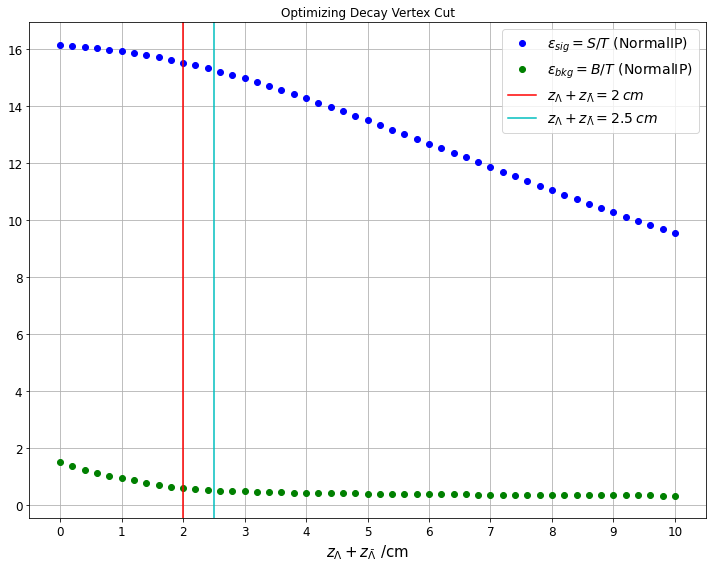

In [18]:
plt.figure(figsize=(10,8))

plt.plot(efwp1["dvz"].values, eff_sig, 'bo', label='$\epsilon_{sig} = S/T$ (NormalIP)')
plt.plot(ebkg1["dvz"].values, bkg_sig, 'go', label='$\epsilon_{bkg} = B/T$ (NormalIP)')

plt.axvline(x=2.0, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2 \: cm$', c='r')
plt.axvline(x=2.5, label=r'$z_{\Lambda} + z_{\bar{\Lambda}} = 2.5 \: cm$', c='c')

# Call Commands:
plt.title('Optimizing Decay Vertex Cut')
plt.xlabel(r'$z_{\Lambda} + z_{\bar{\Lambda}}$ /cm', fontsize=15)
# plt.ylabel('$S/\sqrt{S+B}$', fontsize=15)
plt.xticks(np.arange(min(efwp1["dvz"]), max(efwp1["dvz"])+1, 1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14, loc='best')
plt.tight_layout()
# plt.savefig('eff_1.pdf')